# Calculos UDIBONOS

Los Bonos de Desarrollo del Gobierno Federal denominados en Unidades de Inversión
(UDIBONOS) fueron creados en 1996 y son instrumentos de inversión que protegen al
tenedor ante cambios inesperados en la tasa de inflación. Los UDIBONOS se colocan a
largos plazos y pagan intereses cada seis meses en función de una tasa de interés real fija
que se determina en la fecha de emisión del título.

- **Valor Nominal (VN):** El valor nominal del bono = 100 UDIS (cien Unidades de Inversión).
- **Período de Interés (Nj):** Los títulos devengan intereses en pesos cada seis meses. Esto es, cada 182 días o al plazo que sustituya a éste en caso de días inhábiles (Plazo en días del cupón J).
- **Tasa de interés anual del cupón (TC):**  La tasa de interés que pagan estos títulos es fijada por el Gobierno Federal en la emisión de la serie.
- **Intereses por pagar al final del periodo J (Ij):** Los intereses se calculan considerando los días efectivamente transcurridos entre las fechas de pago de los mismos, tomando como base años de 360 días, y se liquidan al finalizar cada uno de los períodos de interés.

![Imagen](imagenes\Ij_Bonos_M.png) 

donde:

IJ = Intereses por pagar al final del periodo J

TC = Tasa de interés anual del cupón J

VN = Valor nominal del título en Unidades de Inversión

NJ = Plazo en días del cupón J


Conociendo el rendimiento a vencimiento del título, la fórmula general se simplifica
enormemente debido a que las tasas rj para descontar los diferentes flujos a valor
presente pasan a ser la misma en todos los factores de descuento. Por consiguiente, una
vez conocido el rendimiento a vencimiento del título y suponiendo que el plazo en días de
todos los cupones es el mismo, la fórmula general se puede expresar de la siguiente
forma:

![Imagen](imagenes\PrecioLimpioSimpleUDIBONOS.png)

In [1]:
def calcular_precio_limpio(TC,r,d,K,VN=100):
    
    def calc_C(TC,VN=100):
        return VN*182*TC/360

    def calc_R(r):
        return r*182/360
    
    C = calc_C(TC,VN) 
    R = calc_R(r)
    
    num1 = 1/R - 1/(R*(1+R)**(K-1))
    num2 = VN/((1+R)**(K-1))
    den = (1+R)**(1-d/182)
    
    return (C + C*num1+num2)/den - C*d/182

## Prueba

![Imagen](imagenes\ejemploUDIBONOS.png)


In [2]:
TC = 0.08
r = 0.0825
d = 21
K =20
PrecioLimpio = calcular_precio_limpio(TC,r,d,K)
print(f"Precio limpio: {round(PrecioLimpio,6)} , valor esperado : 98.30596 UDIS")

Precio limpio: 98.305962 , valor esperado : 98.30596 UDIS


In [3]:
def calc_R(r):
    return r*182/360
r =0.0825
calc_R(r)

0.04170833333333333

In [4]:
def calc_C(TC,VN=100):
        return VN*182*TC/360
TC = 0.08
calc_C(TC)

4.044444444444444

In [5]:
def calc_intDev(TC,d, VN=100):
    return VN*d*TC/360

d = 21
TC = 0.08
Idev = calc_intDev(TC,d)
PrecioSucio = PrecioLimpio+Idev
print(f"Precio Sucio: {PrecioSucio}")

Precio Sucio: 98.7726287676972


In [6]:
import scipy.optimize as optimize

def calc_rendimientoVencimiento(PrecioLimpio,TC,d,K):
    
    # Definicion de función objetivo que encuentra la tasa de rendimiento
    def objetivo(r):
        return calcular_precio_limpio(TC,r,d,K) - PrecioLimpio
    
    # Encontrar la tasa de rendimiento utilizando scipy.optimize.newton
    tasa_rendimiento = optimize.newton(objetivo, 0.1)  # Suponemos siempre una tasa inicial del 10%
    
    return round(tasa_rendimiento,6)


In [7]:
PrecioLimpio = calcular_precio_limpio(TC,r,d,K)
TC = 0.08
d = 21
K =20
rendimiento = calc_rendimientoVencimiento(PrecioLimpio,TC,d,K)
rendimiento

0.0825

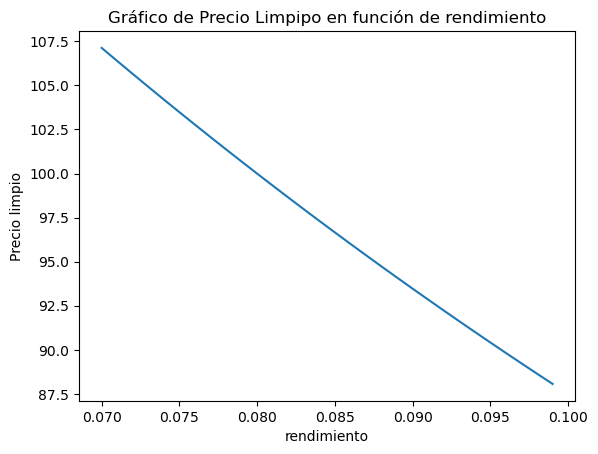

In [8]:
import numpy as np
import matplotlib.pyplot as plt  # Asegúrate de importar la biblioteca de gráficos

# Crea un array de valores x con un rango de 9 a 12 con paso 0.01
x = np.arange(0.07, 0.1, 0.001)


# Valores entrada de funcion
d = 21
K = 20
TC = 0.08

# Luego, puedes calcular los valores correspondientes de y usando calc_PrecioLimpio
y = [calcular_precio_limpio(TC,valor_r,d,K) for valor_r in x]

# Finalmente, plotea los datos
plt.plot(x, y)
plt.xlabel('rendimiento')
plt.ylabel('Precio limpio')
plt.title('Gráfico de Precio Limpipo en función de rendimiento')
plt.show()  # Muestra el gráfico

In [9]:
# Ejemplo1 : https://www.youtube.com/watch?v=Ta9vXrt-cvw
# ¿Cómo calcular precio sucio y limpio de los UDIBONOS?

TC = 0.052
r = 0.056
d = 0
K = 9

UDIS = 6.194162
PrecioLimpio = calcular_precio_limpio(TC,r,d,K)
print(f"Precio limpio en pesos: {PrecioLimpio*UDIS}")  

Precio limpio en pesos: 609.5860758290873


In [10]:
# Ejemplo2 : https://www.youtube.com/watch?v=Ta9vXrt-cvw
# ¿Cómo calcular precio sucio y limpio de los UDIBONOS?
TC = 0.0525
r = 0.055
d = 50+3
K = (1452+50)//182
PrecioLimpio = calcular_precio_limpio(TC,r,d,K)

Idev = calc_intDev(TC,d)
PrecioSucio = PrecioLimpio+Idev

print(f"Precio limpio en pesos en UDIS: {PrecioLimpio} , VALOR ESPERADO :{99.128189}" )  
print(f"Precio Sucio: {PrecioSucio}")

Precio limpio en pesos en UDIS: 99.12628817832423 , VALOR ESPERADO :99.128189
Precio Sucio: 99.89920484499089


# Pruebas con vector

In [1]:
from S_UDIBONOS import UDIBONOS

from datetime import datetime, date
import pandas as pd
import numpy as np 

def cargarInfoBono(num_serie,archivo = "info_Bonos\\20230831_t-1_Vector_S.xlsx"):
    df_vectorInvex = pd.read_excel(archivo)
    serie = [ x for x in ['Serie','SERIE'] if x in df_vectorInvex.columns ][0]
    bono_analizar = df_vectorInvex[df_vectorInvex[serie] == num_serie].reset_index(drop=True)
    info_bono_analizar = {}
    for key in bono_analizar.columns:
        val = bono_analizar.loc[0,key]
        info_bono_analizar[key] = val 
    return info_bono_analizar


#prueba 
num_serie = 431112
infoBono = cargarInfoBono(num_serie)
BonoEnEvaluacion = UDIBONOS(infoBono)

print(f"Serie: {num_serie}")
      
PrecioLimpioCalculado = BonoEnEvaluacion.calcPrecioLimpio()
PrecioLimpioVector = BonoEnEvaluacion.verInfoBono()['PrecioLimpio']      
print(f"PrecioLimpioCalculado =  {PrecioLimpioCalculado}, PrecioLimpioVector = {PrecioLimpioVector}")
      
RendimientoCalculado = BonoEnEvaluacion.calcRendimiento()
RendimientoVector =  BonoEnEvaluacion.verInfoBono()['TasaDeRendimiento']
print(f"RendimientoCalculado =  {RendimientoCalculado}, RendimientoVector = {RendimientoVector}")


Serie: 431112
PrecioLimpioCalculado =  637.739076, PrecioLimpioVector = 637.739077
RendimientoCalculado =  4.665, RendimientoVector = 4.665


In [12]:
# Se pueden verificar calculo de valores
# fechas = BonoEnEvaluacion.calcular_fechas_cupon()
# dias_ultimo_cupon = BonoEnEvaluacion.calcular_dias_ultimo_cupon()
# fechas_DesdeUltimoCupon = BonoEnEvaluacion.calcular_fechas_ultimo_cupon()
print(BonoEnEvaluacion.verInfoBono()['TasaCupon'])
print(BonoEnEvaluacion.verInfoBono()['TimId'],BonoEnEvaluacion.verCalculos()['PrecioLimpio'])

3.25
2023-08-31 {'PrecioLimpio': 637.739077, 'PrecioLimpioUDIS': 81.45291200265456, 'TasaCupon': 0.0325, 'TasaDeRendimiento': 0.04664999992846821, 'DiasTranscCpn': 84, 'CuponesCobrar': 41}


## Revision de todos los bonos en vector

In [4]:
import math

def series(archivo ="info_Bonos\\20230831_t-1_Vector_S.xlsx   "):
    df_vectorInvex = pd.read_excel(archivo)
    serie = [ x for x in ['Serie','SERIE'] if x in df_vectorInvex.columns][0]
    return list(df_vectorInvex[serie])

tol = 1e-6
Error = False
for num_serie in series():
    infoBono = cargarInfoBono(num_serie)
    BonoEnEvaluacion =  UDIBONOS(infoBono)
    PrecioLimpioCalculado = BonoEnEvaluacion.calcPrecioLimpio()
    PrecioLimpioVector = BonoEnEvaluacion.verInfoBono()['PrecioLimpio'] 
    RendimientoCalculado = BonoEnEvaluacion.calcRendimiento()
    RendimientoVector =  BonoEnEvaluacion.verInfoBono()['TasaDeRendimiento']
    if (not math.isclose(PrecioLimpioCalculado, PrecioLimpioVector, rel_tol=tol, abs_tol=tol) or not math.isclose(RendimientoCalculado, RendimientoVector, rel_tol=tol, abs_tol=tol)):
        Error = True
    else:
        print(f"Serie: {num_serie}, PrecioLimpioCalc={PrecioLimpioCalculado}, PrecioLimpioVec={PrecioLimpioVector}, RendimientoCalc={RendimientoCalculado}, RendimientoVec={RendimientoVector} ")
if not Error:
    print(f"Todos los calculos coinciden con una exactitud de {tol} digitos significativos")

Serie: 231116, PrecioLimpioCalc=779.230363, PrecioLimpioVec=779.230363, RendimientoCalc=5.74, RendimientoVec=5.74 
Serie: 251204, PrecioLimpioCalc=763.688587, PrecioLimpioVec=763.688587, RendimientoCalc=5.655, RendimientoVec=5.655 
Serie: 261203, PrecioLimpioCalc=720.706651, PrecioLimpioVec=720.706651, RendimientoCalc=5.67, RendimientoVec=5.67 
Serie: 281130, PrecioLimpioCalc=748.447487, PrecioLimpioVec=748.447488, RendimientoCalc=4.95, RendimientoVec=4.95 
Serie: 311127, PrecioLimpioCalc=671.990951, PrecioLimpioVec=671.990951, RendimientoCalc=4.83, RendimientoVec=4.83 
Serie: 351122, PrecioLimpioCalc=773.016192, PrecioLimpioVec=773.016192, RendimientoCalc=4.635, RendimientoVec=4.635 
Serie: 401115, PrecioLimpioCalc=723.399004, PrecioLimpioVec=723.399005, RendimientoCalc=4.64, RendimientoVec=4.64 
Serie: 431112, PrecioLimpioCalc=637.739076, PrecioLimpioVec=637.739077, RendimientoCalc=4.665, RendimientoVec=4.665 
Serie: 461108, PrecioLimpioCalc=710.579221, PrecioLimpioVec=710.579221, Re